<a href="https://colab.research.google.com/github/alotfata/ANN-housing-project/blob/main/Copy_of_FS_Asthma_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import pandas library
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

#importing libraries
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


import matplotlib as mpl
import matplotlib.pyplot as plt


from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.preprocessing import minmax_scale
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Reading dataset

In [ ]:
df_Sociofeature=pd.read_csv('F:/df_Features.csv')
df_Health=pd.read_csv('F:/Health.csv')
df_Health2=pd.read_csv('F:/Health_2.csv')


df_Pm=pd.read_csv('F:/pm1.csv')
df_Pm.drop(['StateFIPS','State','County','Year','Data Comment'], axis=1,inplace=True)
df_Pm.columns=['FIPS', 'PM']

FileNotFoundError: ignored

In [ ]:
#pd.set_option('display.max_rows', None)

df_0=pd.merge(df_Sociofeature, df_Health, on="FIPS", how='outer', suffixes=['_l', '_r'])
df_1=pd.merge(df_0, df_Health2, on="FIPS", how='outer', suffixes=['_l', '_r'])
df_2=pd.merge(df_1, df_Pm, on="FIPS", how='outer', suffixes=['_l', '_r'])
df_2.dropna(inplace=True)
df_2.reset_index(inplace=True)
df_2.drop("index",axis=1,inplace=True)
df_2




'''pd.set_option('display.max_rows', None)'''
df_Features = df_2.copy()


df_Features= df_Features.fillna(df_Features.mean())
All=df_Sociofeature

'''col_to_drop = ['FIPS','COUNTY', 'STATE', 'ST_ABBR','Long','Lat',
               'V3_THEME1', 'V3_THEME2', 'V3_THEME3','V3_THEME4', 
               'V3_THEME5', 'V3_THEME6', 'V3_THEME7', 'V3_CCVI', 
              'StateAbbr', 'StateDesc', 'CountyName', 'TotalPopulation']
'''


col_to_drop = ['FIPS','COUNTY', 'STATE', 'ST_ABBR', 'ses_EP_PCI', 'ses_EP_NOHSDP',
               'hh_EP_SNGPNT', 'hh_EP_NOVEH', 'hh_EP_GROUPQ', 'hh_EP_PLUMB', 'hc_icu_capita',
               'hc_hosp_beds_capita', 'hc_pqi', 'hc_emer_services_capita',
               'hc_epi_capita', 'hc_health_labs_capita', 'hc_spend_capita',
               'hc_PHEP_capita', 'hr_incarcerated_per_100k',
               'hr_all_care_residents_per_100k', 'hr_high_risk_employees_per_100k',
               'pd_population_density', 'V3_THEME1', 'V3_THEME2', 'V3_THEME3',
               'V3_THEME4', 'V3_THEME5', 'V3_THEME6', 'V3_THEME7', 'V3_CCVI', 'Long',
               'Lat', 'insurance', 'cancer', 'VacantH', 'StateAbbr',
               'StateDesc', 'CountyName', 'TotalPopulation', 'ACCESS2_AdjPrev',
               'ARTHRITIS_AdjPrev', 'BPHIGH_AdjPrev', 'BPMED_AdjPrev',
               'CANCER_AdjPrev', 'CASTHMA_AdjPrev', 'CERVICAL_AdjPrev', 'CHD_AdjPrev',
               'CHECKUP_AdjPrev', 'CHOLSCREEN_AdjPrev', 'COLON_SCREEN_AdjPrev',
               'COPD_AdjPrev', 'COREM_AdjPrev', 'COREW_AdjPrev', 'DENTAL_AdjPrev', 'DIABETES_AdjPrev',
               'GHLTH_AdjPrev', 'HIGHCHOL_AdjPrev', 'KIDNEY_AdjPrev', 'LPA_AdjPrev',
               'MAMMOUSE_AdjPrev', 'MHLTH_AdjPrev', 'PHLTH_AdjPrev',
               'SLEEP_AdjPrev', 'STROKE_AdjPrev', 'TEETHLOST_AdjPrev'
               ,'ses_EP_UNEMP','hh_EP_DISABL','hh_EP_AGE17', 'pm_EP_AGE65','BINGE_AdjPrev', 'hh_EP_CROWD']
df_Features = df_Features.drop(col_to_drop,axis=1)

df_Features


import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df= df_Features.copy()

df= pt.fit_transform(df)
df=pd.DataFrame(df,columns=df_Features.columns)

#df["FIPS"]=df_Features.FIPS
df.columns
df_Features=df.copy()
#df_Features
Var='asthma'
#df_Features['asthma'] = np.where(df_Features['asthma']>0, 1, 0)
y= df_Features[Var].values
X=df_Features.drop([Var],axis =1)



In [ ]:
df_Features

,ses_EP_POV,ses_EP_UNINSUR,ms_EP_MINRTY,ms_EP_LIMENG,hh_EP_MUNIT,hh_EP_MOBILE,NDVI,asthma,CSMOKING_AdjPrev,DEPRESSION_AdjPrev,OBESITY_AdjPrev,PM
0,0.116637,-0.485685,0.488266,0.018360,0.306752,0.714017,-0.935236,0.318077,-0.142740,1.030075,-0.179523,0.913943
1,-0.770796,0.257629,0.058795,-0.395366,1.861343,0.087399,-0.588119,-0.293235,-0.094055,0.920927,-1.434209,-0.462340
2,1.786111,0.453565,1.376901,0.673334,-0.706342,1.455793,-1.063973,1.636888,1.740643,0.866092,1.110111,0.632791
3,-0.117095,-0.269489,0.506207,-0.770707,-0.149697,1.414064,-1.450884,0.414803,1.154064,1.273181,1.326611,0.858418
4,-0.048530,0.415703,-0.240082,0.729177,-0.994573,1.207250,-0.146791,0.318077,0.457071,0.948279,0.662812,0.858418
...,...,...,...,...,...,...,...,...,...,...,...,...
3053,-0.484564,0.599013,0.260238,0.673334,0.683020,0.995329,-1.643801,-0.963601,-0.813258,-1.118563,-0.597128,-1.726932
3054,-1.637320,0.216335,0.145865,1.466325,0.997558,-1.182330,-0.388314,-2.239765,-2.329180,-1.789198,-2.765096,-1.881112
3055,-0.388522,0.633968,-0.273690,-0.104174,0.737103,1.207250,-1.627825,-0.293235,-0.363437,-0.810096,-1.393545,-0.659630
3056,-0.407492,1.130596,0.121625,-0.770707,-0.842220,0.098316,-0.999446,-0.620473,-0.662010,-1.243830,-1.574597,-1.881112


# 

# //----------------------------Feature selection----------------------------------//

### //--------------------------------------Pearson Correlation----------------------------------//

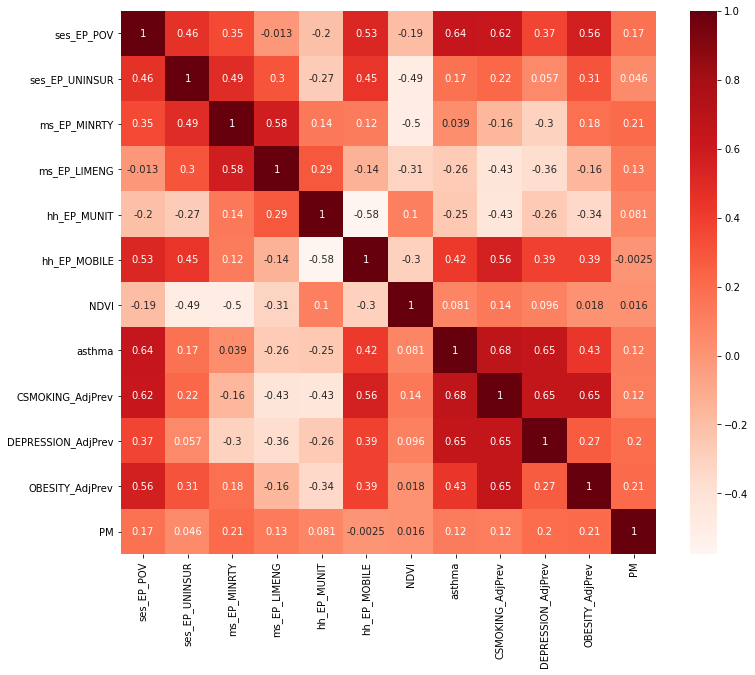

Pearson-Dropped columns:  ms_EP_MINRTY




,Variables,Values
0,CSMOKING_AdjPrev,0.679527
1,DEPRESSION_AdjPrev,0.652732
2,ses_EP_POV,0.642253
3,OBESITY_AdjPrev,0.434691
4,NDVI,0.431204
5,hh_EP_MOBILE,0.420346
6,ms_EP_LIMENG,0.264505
7,hh_EP_MUNIT,0.250741
8,ses_EP_UNINSUR,0.171886
9,PM,0.122580


In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


#Correlation with output variable
cor_target = abs(cor["asthma"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features.NDVI=relevant_features.NDVI+0.35
relevant_features.drop("asthma", inplace=True)
relevant_features.sort_values(inplace=True, ascending=False)


Drop_pearson=relevant_features.tail(1).index
relevant_features.drop(relevant_features.tail(1).index,inplace=True)
relevant_features



X1=X.copy()
for col in Drop_pearson:
    print("Pearson-Dropped columns: ", col)
    print("\n")
    #print(col)
    X1.drop([col], axis=1, inplace=True)


df_pearson_columns = pd.DataFrame(data=relevant_features.index, columns=['Variables'])
df_pearson_values = pd.DataFrame(data=relevant_features.values, columns=['Values'])
df_pearson = pd.merge(df_pearson_columns, df_pearson_values, left_index=True, right_index=True)
df_pearson.sort_values(by= "Values", ascending=False, inplace=True)
df_pearson.reset_index(drop=True, inplace=True)
#df_pearson.drop(df.tail(2).index,inplace=True)

df_pearson


## //--------------------------------- MIS score (mutual information score)-------------------------//

In [ ]:
for colname in X1.select_dtypes("object"):
            X1[colname], _ = X1[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X1.dtypes == int



from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X1, y, discrete_features):
    mi_scores = mutual_info_regression(X1, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X1.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X1, y, discrete_features)
#mi_scores[::1]  # show a few features with their MI scores
#print(mi_scores)

mi_scores.sort_values(inplace=True, ascending=False)
mi_scores.drop(mi_scores.tail(1).index,inplace=True)

mi_scores

df_mis_columns = pd.DataFrame(data=mi_scores.index, columns=['Variables'])
df_mis_values = pd.DataFrame(data=mi_scores.values, columns=['Values'])
df_mis = pd.merge(df_mis_columns, df_mis_values, left_index=True, right_index=True)
df_mis.sort_values(by= "Values", ascending=False, inplace=True)
df_mis.reset_index(drop=True, inplace=True)




Drop_mis=mi_scores.tail(1).index

X2=X1.copy()
for col in Drop_mis:
    print("MIS-Drop columns: ", col)
    print("\n")
    X2.drop([col], axis=1, inplace=True)
X2.columns
df_mis

MIS-Drop columns:  ses_EP_UNINSUR




,Variables,Values
0,CSMOKING_AdjPrev,0.423958
1,DEPRESSION_AdjPrev,0.370286
2,ses_EP_POV,0.313414
3,OBESITY_AdjPrev,0.136388
4,hh_EP_MOBILE,0.128526
5,ms_EP_LIMENG,0.059191
6,PM,0.050784
7,NDVI,0.049436
8,ses_EP_UNINSUR,0.046917


# AI feature selection

                      DT_Reg    RF_Reg   XGB_Reg  Premutation_Reg_KN    Hybrid
CSMOKING_AdjPrev    1.000000  0.626512  1.000000            0.167168  0.698420
DEPRESSION_AdjPrev  0.519902  0.348024  0.561467            0.842971  0.568091
ses_EP_POV          0.502360  0.350673  0.351758            0.881457  0.521562
OBESITY_AdjPrev     0.240534  0.270039  0.472809            0.921410  0.476198
PM                  0.361939  0.194407  0.374783            0.938739  0.467467
hh_EP_MUNIT         0.733860  1.000000  0.000000            0.000000  0.433465
hh_EP_MOBILE        0.198396  0.185782  0.317298            0.962570  0.416012
NDVI                0.275618  0.204061  0.199351            0.963610  0.410660
ms_EP_LIMENG        0.000000  0.000000  0.036924            1.000000  0.259231


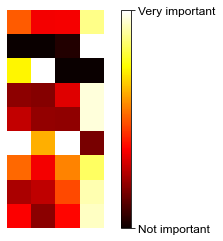

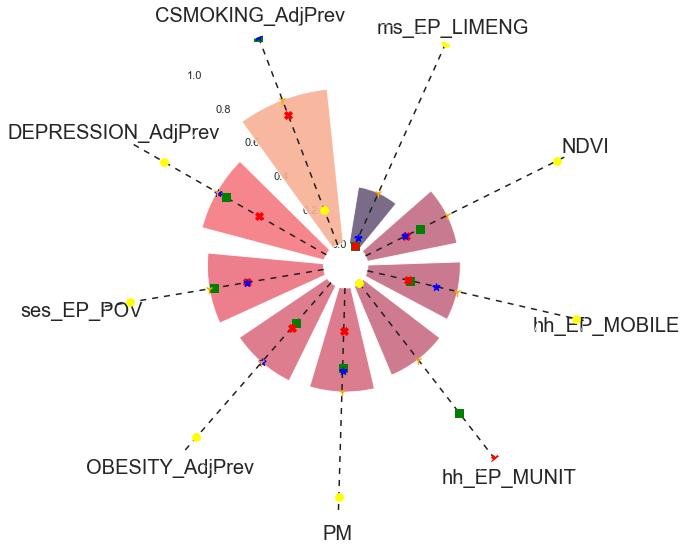

In [ ]:
columns=['Lin_Reg', 'Log_Reg', 'DT_Reg', 'DT_Cla', 'RF_Reg', 'RF_Cla',
       'XGB_Reg', 'XGB_Cla', 'Premutation_Reg_KN', 'Premutation_Cla_KN']
cols = columns

Sheetname=[]
# Data reading and scaling
    
drop_columns=[]
xls = df_Features

Sheet="Asthma"
Var="asthma"

df1= df_Features


df_Features
y= df_Features[Var].values
X=X2#.drop([Var],axis =1)
(X_train, X_test, y_train, y_test) =  train_test_split(X, y, test_size=0.3, random_state=2)



##############################################################################################

                                            #DT

##############################################################################################
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset

DT_Reg = []
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    DT_Reg.append(v)
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.title("DecisionTreeRegressor Feature importances via coefficients")
#plt.savefig('DecisionTreeRegressor.png', dpi=1000)
#pyplot.show()






##############################################################################################

                                            #RF

##############################################################################################

# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot


RF_Reg=[]
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    RF_Reg.append(v)
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.title("RandomForestRegressor Feature importances via coefficients")
#plt.savefig('RandomForestRegressor.png', dpi=1000)

#pyplot.show()









##############################################################################################

                                            #XGBOOSt

##############################################################################################
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define the model

XGB_Reg=[]
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    XGB_Reg.append(v)
    #rint('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.title("XGBRegressor Feature importances via coefficients")
#plt.savefig('XGBRegressor.png', dpi=1000)
#pyplot.show()



##############################################################################################

                                            #PKNN

##############################################################################################

# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

Premutation_Reg_KN=[]
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    Premutation_Reg_KN.append(v)
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.title("Permutation Regression via coefficients")
#plt.savefig('Permutation Regression.png', dpi=1000)
#pyplot.show()












##############################################################################################

                                            #importance

##############################################################################################

Importance =pd.DataFrame()
Features =X.columns


#Importance["Features"]=Features
#Importance = pd.DataFrame(columns = columns, index = Features)
#Importance["Lasso"]=Lasso
#Importance["Lin_Reg"]=Lin_Reg
#Importance["Log_Reg"]=Log_Reg


DT_Reg = minmax_scale(DT_Reg, feature_range=(0.0,1), axis=0)
RF_Reg = minmax_scale(RF_Reg, feature_range=(0.0,1), axis=0)
XGB_Reg = minmax_scale(XGB_Reg, feature_range=(0.0,1), axis=0)
Premutation_Reg_KN = minmax_scale(Premutation_Reg_KN, feature_range=(0.0,1), axis=0)

Importance["DT_Reg"]=DT_Reg
#Importance["DT_Cla"]=DT_Cla
Importance["RF_Reg"]=RF_Reg
#Importance["RF_Cla"]=RF_Cla
Importance["XGB_Reg"]=XGB_Reg
#Importance["XGB_Cla"]=XGB_Cla
Importance["Premutation_Reg_KN"]=Premutation_Reg_KN
#Importance["Premutation_Cla_KN"]=Premutation_Cla_KN
columns = Importance.columns
#Importance.reset_index(inplace=True)


min_max_scaler = preprocessing.MinMaxScaler()
XX= Importance.values
#XX = min_max_scaler.fit_transform(XX)





from sklearn import preprocessing
XX=preprocessing.normalize(XX,norm='l2')
XX = minmax_scale(XX, feature_range=(0,1), axis=0)
###########################################################################






#Heat map
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)






def plot_digit(data):
    image = data.reshape(len(X.columns),4)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")


plot_digit(XX)

cbar = plt.colorbar(ticks=[XX.min(), XX.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])


#plt.savefig('feature_importance_plot.png', dpi=1000)
#save_fig("feature_importance_plot")
#plt.show()






# defining index for the dataframe
idx = X2.columns

# defining columns for the dataframe
cols = columns

# entering values in the index and columns  
# and converting them into a panda dataframe
df_1 = pd.DataFrame(XX,columns = cols, index = idx)




import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()



#########################################################################################



df_1["Hybrid"] = df_1.sum(axis=1)/4
df_1 = df_1.sort_values(by='Hybrid', ascending=False)


#df_2 = minmax_scale(df_1, feature_range=(0.3,1), axis=0)
#df_1 = pd.DataFrame(df_2,columns = cols, index = idx)
df_1.to_excel('Importance_Asthma.xls', sheet_name=Sheet)
print(df_1)

#########################################################################################



import matplotlib.pyplot as plt
import pandas as pd

# Defining index for the dataframe
idx = X.columns

# Defining columns for the dataframe
cols = columns

# Entering values in the index and columns  
# and converting them into a panda dataframe
df_1 = pd.DataFrame(XX,columns = cols, index = idx)




#Sort based on the Summation
df_1["Hybrid"] = df_1.sum(axis=1)/4
df_1=df_1.sort_values(by='Hybrid', ascending=False)
#df_1=df_1.drop('Hybrid',axis=1)





data = df_1
data =data[:16]
#data["Unnamed: 0"]="methods"


ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(data), endpoint=False)
df_sorted= data
# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False)

# Cumulative length
LENGTHS = df_sorted["Hybrid"].values

# Mean gain length
#Lasso = df_sorted["Lasso"].values
DT_Reg = df_sorted["DT_Reg"].values
RF_Reg = df_sorted["RF_Reg"].values
XGB_Reg = df_sorted["XGB_Reg"].values
Premutation_Reg_KN = df_sorted["Premutation_Reg_KN"].values
Hybrid = df_sorted["Hybrid"].values

# Variables label
Variables = df_sorted.index#["Unnamed: 0"].values


GREY12 = "#1f1f1f"


# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=data.Hybrid.min(), vmax=data.Hybrid.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(data.Hybrid))




# Some layout stuff ----------------------------------------------
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-0.1, 1)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 1, color=GREY12, ls=(0, (4, 4)), zorder=11)

# Add dots to represent the mean gain
#ax.scatter(ANGLES, Lasso, s=60, marker='^', color=GREY12, zorder=20)
ax.scatter(ANGLES, DT_Reg, s=60, marker="s",color='green', zorder=20)
ax.scatter(ANGLES, RF_Reg, s=60, marker="X",color='red', zorder=20)
ax.scatter(ANGLES, XGB_Reg, s=60, marker="*",color='blue', zorder=20)
ax.scatter(ANGLES, Premutation_Reg_KN, marker="o",s=60, color='yellow', zorder=20)
ax.scatter(ANGLES, Hybrid, marker="1", s=60, color='orange', zorder=20)


# Add labels for the Variables -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
Variables = ["\n".join(wrap(r, 5, break_long_words=False)) for r in Variables]
Variables


# Remove lines for polar axis (x)
ax.xaxis.grid(False)


# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")


XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(10)


    
    
    
    
    
    
# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(Variables, size=20);

fig.savefig('Importance_radar2_'+Var+'-'+Sheet+'Without', dpi=500)

Sheetname.append(Var+'-'+Sheet)

        
        
with pd.ExcelWriter('FS_Asthma.xlsx') as writer:  # doctest: +SKIP
    df1.to_excel(writer, sheet_name=Sheetname[0])


In [ ]:
df1.columns

Index(['ses_EP_POV', 'ses_EP_UNINSUR', 'ms_EP_MINRTY', 'ms_EP_LIMENG',
       'hh_EP_MUNIT', 'hh_EP_MOBILE', 'NDVI', 'asthma', 'CSMOKING_AdjPrev',
       'DEPRESSION_AdjPrev', 'OBESITY_AdjPrev', 'PM'],
      dtype='object')